## Install the necessary Libraries

In [1]:
#Fill In The 5 Missing Import Statements
import pandas as pd
pd.set_option('display.max_colwidth', 200)

#fill in function for train test split.
from sklearn.model_selection import train_test_split

#Use the Sequential class. 
from tensorflow.keras.models import Sequential

#If using vectorizers (optional - uncomment next line to use the code)
from sklearn.feature_extraction.text import CountVectorizer

#Select the correct crossentropy function for the task.
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
 
from numpy import argmax
import numpy as np
import re

import matplotlib.pyplot as plt
#Use confusion matrix  and classification report from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Install Data

1. Load the dataset **'yt_sentiment.csv'** into a Pandas Dataframe.
2. The csv file has a column named 'Sentiment'. Label 1 means 'Positive' sentiment while label 0 means 'Negative' sentiment.

In [2]:
df=pd.read_csv('./yt_sentiment.csv')

### Show the first 10 rows of data

In [3]:
df.head(10)

,Comment,Sentiment
0,here in nz 50 of retailers don’t even have contactless credit card machines like paywave which support apple pay they don’t like the high fees that come with these,0
1,i will forever acknowledge this channel with the help of your lessons and ideas explanations now its quite helpful while youll just sit at your comfort and monitor your account growth,1
2,whenever i go to a place that doesn’t take apple pay doesn’t happen too often it’s such a drag between ‘contactless covid’ habits and my getting the apple card i’ve gotten so used to apple pay tha...,0
3,apple pay is so convenient secure and easy to use i used it while at the korean and japanese airports no need for physical credit cards,1
4,we only got apple pay in south africa in 20202021 and it’s widely accepted,1
5,in the united states we have an abundance of retailers that accept apple pay but its still good to carry the physical card with you being there are still a large quantity of places that do not acc...,1
6,wow you really went to town on the psu test rack thats a serious bit of kit very flexible good choices wouldnt surprise me if choma start offering this bespoke rack to the psu makers they all watc...,1
7,the lab is the most exciting thing in it ive seen for a while this is reallly going to shake up how the qualiity of even basic components are manufactured,1
8,linus im an engineer and love the lmg content across all the channels very much looking forward to more lab content and hope your engineering team will get more on camera time and hosting roles,1
9,there used to be a time where linus was the smartest guy in the room this video clearly shows that the team he has built are experts in their respective fields and make linus look like a child kud...,1


### Show count of each Sentiment types

In [4]:
df.Sentiment.value_counts()

Sentiment
0    700
1    700
Name: count, dtype: int64

## Create a **clean()** function to do the following data preprocessing:

1. Use the regex sub() function to perform the following for every text:
  * remove all numbers
  * remove special characters
  * remove extra spaces and convert to lowercase
- You may use a combination of replace() method or regex sub() function.  

In [5]:
import re

def clean(text):
    text = re.sub(r'[d\+]', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()
    return text


In [6]:
df.Comment=df.Comment.apply(clean)
df.head(10)

,Comment,Sentiment
0,here in nz 50 of retailers on t even have contactless cre it car machines like paywave which support apple pay they on t like the high fees that come with these,0
1,i will forever acknowle ge this channel with the help of your lessons an i eas explanations now its quite helpful while youll just sit at your comfort an monitor your account growth,1
2,whenever i go to a place that oesn t take apple pay oesn t happen too often it s such a rag between contactless covi habits an my getting the apple car i ve gotten so use to apple pay that i get s...,0
3,apple pay is so convenient secure an easy to use i use it while at the korean an japanese airports no nee for physical cre it car s,1
4,we only got apple pay in south africa in 20202021 an it s wi ely accepte,1
5,in the unite states we have an abun ance of retailers that accept apple pay but its still goo to carry the physical car with you being there are still a large quantity of places that o not accept ...,1
6,wow you really went to town on the psu test rack thats a serious bit of kit very flexible goo choices woul nt surprise me if choma start offering this bespoke rack to the psu makers they all watch...,1
7,the lab is the most exciting thing in it ive seen for a while this is reallly going to shake up how the qualiity of even basic components are manufacture,1
8,linus im an engineer an love the lmg content across all the channels very much looking forwar to more lab content an hope your engineering team will get more on camera time an hosting roles,1
9,there use to be a time where linus was the smartest guy in the room this vi eo clearly shows that the team he has built are experts in their respective fiel s an make linus look like a chil ku os ...,1


## Assign X to 'Comment' and Y to 'Sentiment'

In [7]:
X=df.Comment
Y=df.Sentiment

#export your cleaned results as evidence
X.to_csv('cleaned_yt_sentiment.csv')

## Create Document Vectors

Create your custom vocabulary

Vectorize the dataset

Convert words into numbers for the model to understand

Obtain your X_encoded and Y_encoded

In [8]:
vectorizer = CountVectorizer()

X_encoded = vectorizer.fit_transform(X).toarray()

In [9]:
len(X_encoded)

1400

In [10]:
Y_encoded = pd.get_dummies(Y).values

Y_encoded

array([[ True, False],
       [False,  True],
       [ True, False],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

## Split into train, test sets. 60% for training, 40% for testing

1. Use the train_test_split() function. 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.4, random_state=42)

## Create a neural network model using keras Sequential model

In [12]:
num_epochs=50
model = Sequential()
model.add(Dense(units=64, activation='sigmoid',
                input_dim=len(X_encoded[0])))
model.add(Dense(units=len(Y_encoded[0]), activation='softmax'))
model.compile(loss=categorical_crossentropy,metrics=['acc'],
              optimizer=SGD(learning_rate=0.01,
                            momentum=0.9, nesterov=True))
history=model.fit(np.array(X_train), np.array(y_train), 
                  epochs=num_epochs, 
                  batch_size=16,
                  validation_data=(X_test, y_test),
                  verbose=1)

Epoch 1/50


c:\Users\Gerald Lim\anaconda3\envs\NLP\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.4994 - loss: 0.7149 - val_acc: 0.6411 - val_loss: 0.6621
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6386 - loss: 0.6480 - val_acc: 0.6107 - val_loss: 0.6498
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6477 - loss: 0.6177 - val_acc: 0.6143 - val_loss: 0.6236
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7217 - loss: 0.5612 - val_acc: 0.7018 - val_loss: 0.5927
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7727 - loss: 0.5269 - val_acc: 0.7286 - val_loss: 0.5703
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8365 - loss: 0.4863 - val_acc: 0.7000 - val_loss: 0.5636
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8302 - loss: 0.4510 - val_acc: 0.7607 - val_loss: 0.5290
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8610 - loss: 0.4197 - val_acc: 0.7732 - val_loss: 0.5203
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8371 - loss: 0.3923 - va

## Display the learning curves

Display on the **SAME** graph:

1. **Loss vs Epoch** (Training and Validation)
2. **Accuracy vs Epoch** (Training and Validation)

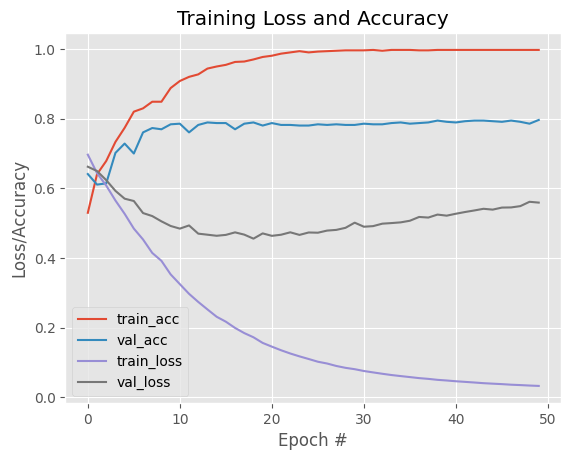

In [13]:
def plot_graphs(H, metric):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history['acc'], label='train_acc')
  plt.plot(np.arange(0, num_epochs), H.history['val_acc'], label='val_acc')
  plt.plot(np.arange(0, num_epochs), H.history['loss'], label='train_loss')
  plt.plot(np.arange(0, num_epochs), H.history['val_loss'], label='val_loss')
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #" )
  plt.ylabel("Loss/Accuracy" )
  plt.legend()
  plt.savefig("model history") #as evidence
  plt.show( )
plot_graphs(history,'acc')

## Use model to predict 'X_test'

In [14]:
preds = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


## Use argmax() to get the highest probability class label from preds

In [15]:
preds=[argmax(each) for each in preds]

## Use argmax() to get the class label from y_test

In [16]:
y_test_cm= [argmax(each) for each in y_test]


## Show Confusion Matrix 

Use sklearn's confusion_matrix function to create a confusion matrix. 

With the confusion matrix, create a pandas dataframe with:
- **Columns** titled 'Positive', 'Negative'
- **Index** titled 'Positive', 'Negative' 

In [17]:
cm = confusion_matrix(y_test_cm, preds)
df_cm = pd.DataFrame(cm, index=['Positive','Negative'], columns=['Positive','Negative'])
df_cm.head()

,Positive,Negative
Positive,220,59
Negative,55,226


## Show Classification Report

In [18]:
print(classification_report(y_test_cm, preds))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       279
           1       0.79      0.80      0.80       281

    accuracy                           0.80       560
   macro avg       0.80      0.80      0.80       560
weighted avg       0.80      0.80      0.80       560



# Question 1:
What is your model's accuracy values?

## Write your answer here:
**#f1-score:**

**#support:**

## Make Prediction On New Text Reviews
Write an appropriate code to predict whether the following text reviews are Positive or Negative and provide the probability in %.


In [19]:
newPositiveText='ive wanted to build a pc all my life but been too scared of breaking something to try this week that ended with my first successful build big thanks to this video'
newNegativeText='big tech having zero accountability has led to unbelievable levels of evil'

In [20]:
def encode_new_sentence(sentence):
    cleaned_sentence = clean(sentence)
    sentence_encoded = vectorizer.transform([cleaned_sentence])
    
    return sentence_encoded

def predict_results(sentence_encoded):
    predictions = model.predict(sentence_encoded)
    prediction_class = argmax(predictions[0])
    if prediction_class == 0:
        print('Prediction: Negative')
    else:
        print('Prediction: Positive')

In [21]:
print("Negative text:", newNegativeText)
predict_results(encode_new_sentence(newNegativeText))
print("\nPositive text:", newPositiveText)
predict_results(encode_new_sentence(newPositiveText))

Negative text: big tech having zero accountability has led to unbelievable levels of evil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Prediction: Negative

Positive text: ive wanted to build a pc all my life but been too scared of breaking something to try this week that ended with my first successful build big thanks to this video
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: Positive


# Question 2:
State the type of NLP Classification used and breifly explain the reason for your answer.

## Write your answer here:

**#Classification Type:** 

**#Reason:** 